In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import optuna

from tqdm.notebook import tqdm

In [2]:
tuna = True

In [3]:
df = pd.read_csv('data/premades/over_by_over_data.csv')

In [5]:
df[df['year'] == 2025].count()

Unnamed: 0                            1972
match_id                              1972
innings                               1972
over                                  1972
ball                                  1972
                                      ... 
bowl_team_top_bowler_4_bowling_sr     1972
bowl_team_top_bowler_4_economy        1972
bowl_team_top_bowler_5_bowling_avg    1972
bowl_team_top_bowler_5_bowling_sr     1972
bowl_team_top_bowler_5_economy        1972
Length: 65, dtype: int64

In [4]:
X = df.drop(columns=['innings_total_score'])
y = df['innings_total_score']

X = X.apply(pd.to_numeric, errors='coerce')

# X = (X - X.mean()) / X.std()
# X = (X - X.min()) / (X.max() - X.min())

In [5]:
#find all the infinite values 
X = X.replace([np.inf, -np.inf], np.nan)

In [6]:
match_ids = X['match_id'].unique()

train_ids, test_ids = train_test_split(match_ids, test_size=0.10, random_state=42)

train_mask = X['match_id'].isin(train_ids)
test_mask = X['match_id'].isin(test_ids)

X_train = X[train_mask].reset_index(drop=True)
X_test = X[test_mask].reset_index(drop=True)
y_train = y[train_mask].reset_index(drop=True)
y_test = y[test_mask].reset_index(drop=True)

In [7]:
if tuna:    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror',
            'random_state': 42
        }

        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    print("Best trial:")
    print(study.best_trial)

    print("Best parameters:")
    print(study.best_params)

    best_params = study.best_params

[I 2025-04-23 14:41:08,506] A new study created in memory with name: no-name-104e7686-034a-4955-9f86-d5b805f0efe4


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-23 14:41:16,867] Trial 0 finished with value: 39.03365545256389 and parameters: {'n_estimators': 499, 'learning_rate': 0.027044887983073293, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.580765673313677, 'subsample': 0.8636239577521838, 'colsample_bytree': 0.56298885363651}. Best is trial 0 with value: 39.03365545256389.
[I 2025-04-23 14:41:18,455] Trial 1 finished with value: 39.29628102912488 and parameters: {'n_estimators': 90, 'learning_rate': 0.2423593593359254, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 1.4230899122461327, 'subsample': 0.7064812738103922, 'colsample_bytree': 0.8323273729769953}. Best is trial 0 with value: 39.03365545256389.
[I 2025-04-23 14:41:49,328] Trial 2 finished with value: 42.606635784117024 and parameters: {'n_estimators': 350, 'learning_rate': 0.19950921735383664, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 4.76609187634062, 'subsample': 0.7545563780749878, 'colsample_bytree': 0.9529889064543586}. Best is trial 0 with value: 39.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

if tuna:    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror',
            'random_state': 42
        }

        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    print("Best trial:")
    print(study.best_trial)

    print("Best parameters:")
    print(study.best_params)

    best_params = study.best_params

[I 2025-04-23 14:43:10,694] A new study created in memory with name: no-name-1f36f519-e027-4d63-9d88-7a7ec43351a5


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-23 14:43:17,977] Trial 0 finished with value: 10.641525025261853 and parameters: {'n_estimators': 305, 'learning_rate': 0.26427968889509024, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.8242774484505633, 'subsample': 0.6382742098612204, 'colsample_bytree': 0.6164862888303596}. Best is trial 0 with value: 10.641525025261853.
[I 2025-04-23 14:43:25,531] Trial 1 finished with value: 9.26522875568715 and parameters: {'n_estimators': 121, 'learning_rate': 0.256534930871881, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.3307008277346629, 'subsample': 0.6967959267927146, 'colsample_bytree': 0.9805059700616228}. Best is trial 1 with value: 9.26522875568715.
[I 2025-04-23 14:43:33,677] Trial 2 finished with value: 37.84640950026998 and parameters: {'n_estimators': 130, 'learning_rate': 0.01005939833597479, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 2.6341412185662936, 'subsample': 0.7575159063628081, 'colsample_bytree': 0.718047191110692}. Best is trial 1 with value: 9.

In [9]:
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

rmses = []

for over in X['over'].unique():
    try:
        y_test_over = y_test[X_test['over'] == over]
        y_pred_over = model.predict(X_test[X_test['over'] == over])
        rmse = np.sqrt(mean_squared_error(y_test_over, y_pred_over))

        rmses.append(rmse)

        print(f"Over: {over}, RMSE: {rmse:.2f}")
    except:
        pass

Over: 0, RMSE: 18.97
Over: 1, RMSE: 12.01
Over: 2, RMSE: 10.70
Over: 3, RMSE: 10.81
Over: 4, RMSE: 7.82
Over: 5, RMSE: 7.43
Over: 6, RMSE: 7.87
Over: 7, RMSE: 6.42
Over: 8, RMSE: 6.41
Over: 9, RMSE: 6.61
Over: 10, RMSE: 6.43
Over: 11, RMSE: 5.85
Over: 12, RMSE: 6.36
Over: 13, RMSE: 6.68
Over: 14, RMSE: 6.76
Over: 15, RMSE: 5.61
Over: 16, RMSE: 5.36
Over: 17, RMSE: 5.80
Over: 18, RMSE: 5.44
Over: 19, RMSE: 5.10
Over: 20, RMSE: 4.92
Over: 21, RMSE: 5.95
Over: 22, RMSE: 5.70
Over: 23, RMSE: 5.17
Over: 24, RMSE: 5.23
Over: 25, RMSE: 5.24
Over: 26, RMSE: 5.45
Over: 27, RMSE: 4.48
Over: 28, RMSE: 4.80
Over: 29, RMSE: 5.07
Over: 30, RMSE: 5.11
Over: 31, RMSE: 5.51
Over: 32, RMSE: 6.15
Over: 33, RMSE: 4.92
Over: 34, RMSE: 5.52
Over: 35, RMSE: 4.99
Over: 36, RMSE: 4.97
Over: 37, RMSE: 5.42
Over: 38, RMSE: 4.83
Over: 39, RMSE: 5.21
Over: 40, RMSE: 4.61
Over: 41, RMSE: 5.12
Over: 42, RMSE: 5.19
Over: 43, RMSE: 4.18
Over: 44, RMSE: 4.86
Over: 45, RMSE: 5.43
Over: 46, RMSE: 4.72
Over: 47, RMSE: 3.9

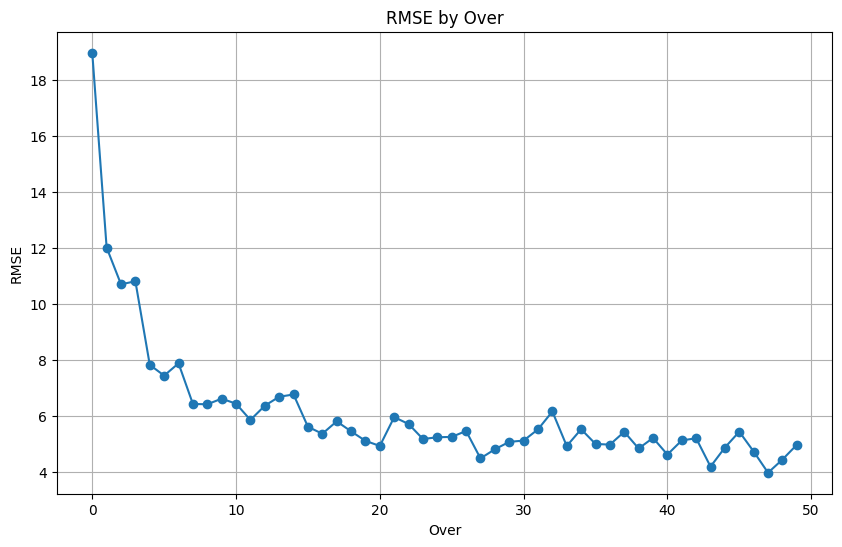

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(X['over'].unique(), rmses, marker='o')
plt.title('RMSE by Over')
plt.xlabel('Over')
plt.ylabel('RMSE')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

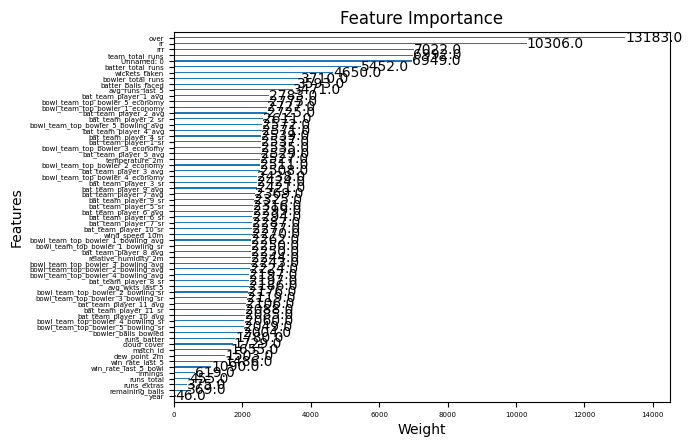

In [11]:
# plot the feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.grid()
plt.show()